## Load the data into a dataframe

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import cross_validation
from sklearn import linear_model
import sklearn.metrics as skmetric
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [99]:
df_all = pd.read_csv("iris_data.csv", names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'])

In [100]:
df = df_all[['PetalLength', 'PetalWidth', 'Species']]

In [101]:
df_iris = df[df['Species'].isin(['Iris-setosa','Iris-versicolor'])]

In [102]:
df_iris.head()

,PetalLength,PetalWidth,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [103]:
df_iris.tail()

,PetalLength,PetalWidth,Species
95,4.2,1.2,Iris-versicolor
96,4.2,1.3,Iris-versicolor
97,4.3,1.3,Iris-versicolor
98,3.0,1.1,Iris-versicolor
99,4.1,1.3,Iris-versicolor


## Divide the data into training and test sets

In [104]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    df_iris[['PetalLength', 'PetalWidth']],
    df_iris['Species'], test_size = 0.4)

## Train perceptron model from sklearn

In [105]:
perceptron_model = linear_model.Perceptron()
perceptron_model.fit(X_train, y_train)
predicted_labels = perceptron_model.predict(X_test)

## Calculate the decision boundary using weights and the intercept

In [106]:
coeffs = perceptron_model.coef_[0]
coeffs

array([ 1.5,  1.3])

In [107]:
intercept = perceptron_model.intercept_[0]
intercept

-4.0

In [108]:
p1 = (0, -intercept/coeffs[1])
p1 

(0, 3.0769230769230775)

In [109]:
p2 = (-intercept/coeffs[0], 0)
p2

(2.6666666666666674, 0)

## Predict labels and evaluate accuracy

In [110]:
predicted_labels

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa'], 
      dtype='<U15')

In [111]:
skmetric.accuracy_score(y_true=y_test, y_pred=predicted_labels)

1.0

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


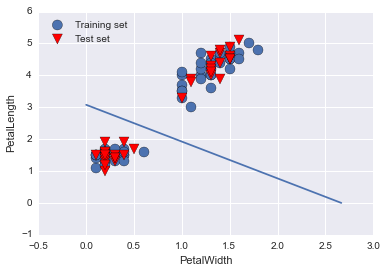

In [112]:
ax = X_train.plot(x='PetalWidth', y='PetalLength' ,kind='scatter', s=100, label='Training set')
X_test.plot(x='PetalWidth', y='PetalLength', kind='scatter', color='r', ax=ax, marker='v', s=100, label='Test set')
plt.legend(loc='upper left')
xs = [p1[0],p2[0]]
ys = [p1[1],p2[1]]
plt.plot(xs,ys)